In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
Comparison = pd.read_csv("Output Data/Comparison.csv")

In [3]:
#ids_to_remove = Comparison.loc[Comparison["Distance"] >= 3.5, "ID (Dino)"].unique()
#Comparison = Comparison[~Comparison["ID (Dino)"].isin(ids_to_remove)]
#Comparison = Comparison[Comparison["Distance"] < 3.5]

In [4]:
#a = Comparison[Comparison["Track Length (CME)"]==Comparison["Track Length (Dino)"] and Comparison["ID (CME)"]]
d = Comparison["ID (Dino)"].unique()


In [5]:
M_comp = Comparison.to_numpy()
ID_vec = defaultdict(list)

for ID in M_comp:
    ID_vec[ID[0]].append(ID)

for ID_val in ID_vec:
    ID_vec[ID_val] = np.array(ID_vec[ID_val]) 

ID_list = np.zeros((len(ID_vec),5), dtype=object)

In [6]:
for i, ID in enumerate(ID_vec):
    ID_val = ID_vec[ID]
    CME_ID = np.unique(ID_val[:,0])
    Dino_IDs = np.unique(ID_val[:,1])
    TL_CME = np.unique(ID_val[:,13])
    TL_Dino = np.unique(ID_val[:,14])

    ID_list[i][0] = CME_ID
    ID_list[i][1] = Dino_IDs
    ID_list[i][2] = TL_CME
    ID_list[i][3] = TL_Dino
    
    if len(Dino_IDs) == 1 and TL_CME == TL_Dino:
    #if np.all(ID_val[:,15]) < 3.5:
        ID_list[i][4] = True
    else:
        ID_list[i][4] = False

In [7]:
Sum = pd.DataFrame(ID_list, columns = ["ID (Dino)","ID (CME)", "Track Length (Dino)", "Track Length (CME)", "True Match"])
Sum.to_csv("Output Data/Sum.csv")

In [8]:
track_lengths = np.array([row[2][0] for row in ID_list])
mask_true = np.array([row[4] for row in ID_list])
print(mask_true)
bins = np.arange(0, 110, 10)

counts, _ = np.histogram(track_lengths, bins)

counts_true, _ = np.histogram(track_lengths[mask_true], bins)

print(counts)
print(counts_true)

labels = np.array(("0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90-99"))
display(Comparison[Comparison["Distance"]<3.5])

[False False False ... False False False]
[6609 2987 1245  637  428  253  170   85   38   36]
[13  1  1  1  0  0  0  0  0  2]


,ID (Dino),ID (CME),x (Dino),y (Dino),z (Dino),x (CME),y (CME),z (CME),t,t_start (Dino),t_start (CME),FI (Dino),FI (CME),Track Length (Dino),Track Length (CME),Distance,Multi ID (CME),Multi Distance (CME)
520,16.0,860.0,269.54680,692.78770,16.094084,269.79,691.08,15.340,53.0,1.0,30.0,539.5,322.880,46.0,25.0,1.882559,860,1.88
521,16.0,860.0,270.31677,692.45386,16.300858,270.18,691.53,15.120,54.0,1.0,30.0,541.5,283.880,46.0,25.0,1.505539,860,1.51
621,18.0,3423.0,307.75763,543.82983,15.925459,309.02,544.60,16.990,92.0,1.0,92.0,258.2,44.061,23.0,7.0,1.822083,3423,1.82
622,18.0,3423.0,307.48620,544.68054,15.741061,308.58,545.31,17.120,93.0,1.0,92.0,262.5,45.731,23.0,7.0,1.869249,3423,1.87
623,18.0,3423.0,306.70297,544.87054,14.561339,308.25,545.40,16.750,94.0,1.0,92.0,263.0,48.462,23.0,7.0,2.732008,3423,2.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178263,12438.0,19.0,326.85135,143.58089,42.663242,327.07,143.26,40.890,99.0,98.0,1.0,276.2,113.660,2.0,99.0,1.815259,19,1.82
178264,12439.0,10.0,361.90805,141.06783,64.679190,362.57,142.13,62.160,98.0,98.0,1.0,245.8,85.433,2.0,99.0,2.812952,10,2.81
178265,12439.0,10.0,361.94214,140.75487,63.695620,361.92,142.12,62.180,99.0,98.0,1.0,265.2,97.173,2.0,99.0,2.039896,10,2.04
178266,12440.0,2830.0,460.63214,368.70380,81.885544,459.47,370.23,84.254,98.0,98.0,91.0,212.5,52.762,1.0,9.0,3.047858,2830,3.05


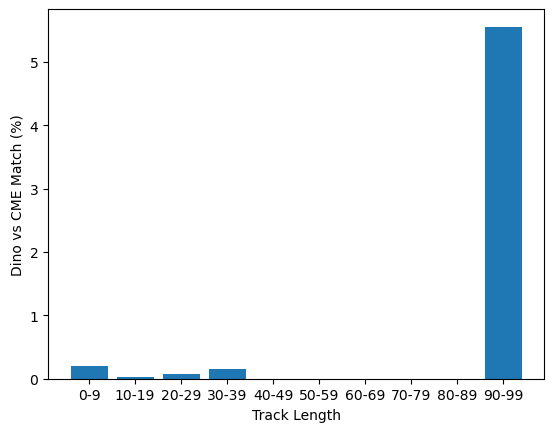

In [9]:
plt.bar(labels,100*counts_true/counts)
plt.xlabel("Track Length")
plt.ylabel("Dino vs CME Match (%)")
plt.show()

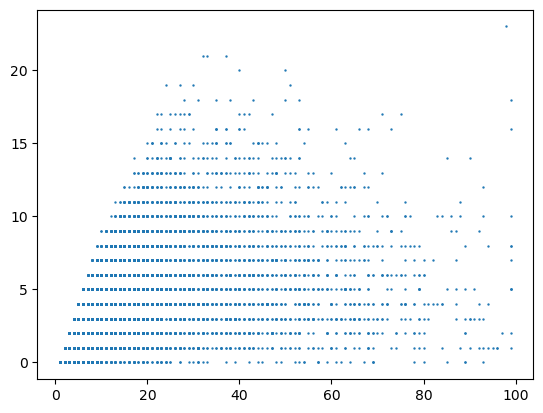

In [10]:
selected = ID_list[ID_list[:, 4] == False]
breaks = np.array([len(x) for x in selected[:,1]])-1
plt.scatter(selected[:,2],breaks, s = 0.5)
plt.show()

# How define break?